## 讀取資料集

In [ ]:
import pandas as pd
import re
import numpy as np
Dataset = pd.read_excel("all_houses.xlsx")

Dataset.head()
# Dataset

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,花台,平台,露台,格局,加蓋格局,屋齡,類型,樓層,車位,管理費
0,信義安和典藏兩房車位,"3,960萬",台北市大安區文昌街,40.57坪,本物件含車位，詳洽經紀人員,2.78坪,21.21坪\n＋,2.06坪,23.27坪\n＝,16.6坪,...,0.7坪,NaN,NaN,2房2廳2衛,--,28.5年,華廈/辦公,2樓/5樓,升降機械(車位總價：200萬),2778 元/月
1,★近捷運電梯高樓前後陽台,"2,660萬",台北市內湖區康寧路三段,36.09坪,73.70 萬/坪,12.35坪,24.03坪\n＋,2.89坪,26.92坪\n＝,9.16坪,...,NaN,NaN,NaN,3房2廳2衛,--,30.1年,華廈,7樓/7樓,--,750 元/月
2,日光４房大空間,"1,580萬",台北市北投區行義路,37.37坪,本物件含加蓋，詳洽經紀人員,7.18坪,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4房2廳2衛1室\n(含加蓋1室),1室,43.3年,華廈,-1樓/8樓,--,2050 元/月
3,稀有海華一樓帶車位,"4,680萬",台北市信義區忠孝東路五段,65.02坪,82.13 萬/坪(扣除車位價及車坪),13.63坪,27坪,NaN,NaN,3.02坪,...,NaN,2.74坪,NaN,3房2廳2衛1室,--,40.0年,華廈,B1-1樓/7樓,坡道平面(車位總價：400萬),900 元/月
4,敦南ＷＯＷ邊間精品小豪宅,"2,925萬",台北市大安區安和路二段,17.05坪,本物件含加蓋，詳洽經紀人員,3.72坪,7.87坪\n＋,0.75坪,8.62坪\n＝,6.83坪,...,NaN,NaN,NaN,1房1廳1衛1室\n(含加蓋1室),1室,3.8年,華廈,4樓/7樓,--,3410 元/月


## 資料前處理 (處理缺失值、新增欄位)




In [ ]:
Dataset['縣市別'] = Dataset['地址'].str.extract(r'(台北市|台中市|台南市|高雄市|新北市|桃園市|基隆市|新竹市|新竹縣|苗栗縣|彰化縣|南投縣|雲林縣|嘉義市|嘉義縣|屏東縣|宜蘭縣|花蓮縣|台東縣|澎湖縣|金門縣|連江縣)')
Dataset.head()

# Dataset['縣市別'] = Dataset['地址'].str.split('市').str[0]+'市'
# Dataset['縣市別'].value_counts()

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,平台,露台,格局,加蓋格局,屋齡,類型,樓層,車位,管理費,縣市別
0,信義安和典藏兩房車位,"3,960萬",台北市大安區文昌街,40.57坪,本物件含車位，詳洽經紀人員,2.78坪,21.21坪\n＋,2.06坪,23.27坪\n＝,16.6坪,...,NaN,NaN,2房2廳2衛,--,28.5年,華廈/辦公,2樓/5樓,升降機械(車位總價：200萬),2778 元/月,台北市
1,★近捷運電梯高樓前後陽台,"2,660萬",台北市內湖區康寧路三段,36.09坪,73.70 萬/坪,12.35坪,24.03坪\n＋,2.89坪,26.92坪\n＝,9.16坪,...,NaN,NaN,3房2廳2衛,--,30.1年,華廈,7樓/7樓,--,750 元/月,台北市
2,日光４房大空間,"1,580萬",台北市北投區行義路,37.37坪,本物件含加蓋，詳洽經紀人員,7.18坪,NaN,NaN,NaN,NaN,...,NaN,NaN,4房2廳2衛1室\n(含加蓋1室),1室,43.3年,華廈,-1樓/8樓,--,2050 元/月,台北市
3,稀有海華一樓帶車位,"4,680萬",台北市信義區忠孝東路五段,65.02坪,82.13 萬/坪(扣除車位價及車坪),13.63坪,27坪,NaN,NaN,3.02坪,...,2.74坪,NaN,3房2廳2衛1室,--,40.0年,華廈,B1-1樓/7樓,坡道平面(車位總價：400萬),900 元/月,台北市
4,敦南ＷＯＷ邊間精品小豪宅,"2,925萬",台北市大安區安和路二段,17.05坪,本物件含加蓋，詳洽經紀人員,3.72坪,7.87坪\n＋,0.75坪,8.62坪\n＝,6.83坪,...,NaN,NaN,1房1廳1衛1室\n(含加蓋1室),1室,3.8年,華廈,4樓/7樓,--,3410 元/月,台北市


In [ ]:
Dataset['總價'] = Dataset['總價'].str.replace(',', '', regex=False)
Dataset['總價'] = Dataset['總價'].str.replace('萬', '0000', regex=False)
Dataset['建坪'] = Dataset['建坪'].str.replace('坪', '', regex=False)
Dataset['地坪'] = Dataset['地坪'].str.replace('坪', '', regex=False)
Dataset['屋齡'] = Dataset['屋齡'].replace('預售', '0')
Dataset['陽台'] = Dataset['陽台'].str.replace('坪', '', regex=False)
Dataset['共有部分'] = Dataset['共有部分'].str.replace('坪', '', regex=False)
Dataset['停車空間(含公設)'] = Dataset['停車空間(含公設)'].str.replace('坪', '', regex=False)
Dataset['雨遮'] = Dataset['雨遮'].str.replace('坪', '', regex=False)
Dataset['防空避難室兼停車場'] = Dataset['防空避難室兼停車場'].str.replace('坪', '', regex=False)
Dataset['騎樓'] = Dataset['騎樓'].str.replace('坪', '', regex=False)
Dataset['花台'] = Dataset['花台'].str.replace('坪', '', regex=False)
Dataset['平台'] = Dataset['平台'].str.replace('坪', '', regex=False)
Dataset['露台'] = Dataset['露台'].str.replace('坪', '', regex=False)
Dataset['屋齡'] = Dataset['屋齡'].str.replace('年', '', regex=False)
Dataset['管理費'] = Dataset['管理費'].str.replace('元/月', '', regex=False)
Dataset.head()

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,平台,露台,格局,加蓋格局,屋齡,類型,樓層,車位,管理費,縣市別
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21坪\n＋,2.06,23.27坪\n＝,16.6,...,NaN,NaN,2房2廳2衛,--,28.5,華廈/辦公,2樓/5樓,升降機械(車位總價：200萬),2778,台北市
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03坪\n＋,2.89,26.92坪\n＝,9.16,...,NaN,NaN,3房2廳2衛,--,30.1,華廈,7樓/7樓,--,750,台北市
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,NaN,NaN,NaN,NaN,...,NaN,NaN,4房2廳2衛1室\n(含加蓋1室),1室,43.3,華廈,-1樓/8樓,--,2050,台北市
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27坪,NaN,NaN,3.02,...,2.74,NaN,3房2廳2衛1室,--,40.0,華廈,B1-1樓/7樓,坡道平面(車位總價：400萬),900,台北市
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87坪\n＋,0.75,8.62坪\n＝,6.83,...,NaN,NaN,1房1廳1衛1室\n(含加蓋1室),1室,3.8,華廈,4樓/7樓,--,3410,台北市


In [ ]:
Dataset['主建物'] = (
    Dataset['主建物']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # 去掉非數字和小數點
    .replace('', float('nan'))  # 將空字符串替換為 NaN
    .astype(float)  # 轉換為浮點數
)
Dataset['主+陽'] = (
    Dataset['主+陽']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # 去掉非數字和小數點
    .replace('', float('nan'))  # 將空字符串替換為 NaN
    .astype(float)  # 轉換為浮點數
)
Dataset.head()
# len(Dataset)

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,平台,露台,格局,加蓋格局,屋齡,類型,樓層,車位,管理費,縣市別
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21,2.06,23.27,16.6,...,NaN,NaN,2房2廳2衛,--,28.5,華廈/辦公,2樓/5樓,升降機械(車位總價：200萬),2778,台北市
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03,2.89,26.92,9.16,...,NaN,NaN,3房2廳2衛,--,30.1,華廈,7樓/7樓,--,750,台北市
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,NaN,NaN,NaN,NaN,...,NaN,NaN,4房2廳2衛1室\n(含加蓋1室),1室,43.3,華廈,-1樓/8樓,--,2050,台北市
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27.00,NaN,NaN,3.02,...,2.74,NaN,3房2廳2衛1室,--,40.0,華廈,B1-1樓/7樓,坡道平面(車位總價：400萬),900,台北市
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87,0.75,8.62,6.83,...,NaN,NaN,1房1廳1衛1室\n(含加蓋1室),1室,3.8,華廈,4樓/7樓,--,3410,台北市


In [ ]:
Dataset['格局(房)'] = Dataset['格局'].str.extract(r'(\d+)房').fillna(0).astype(int)
Dataset['格局(廳)'] = Dataset['格局'].str.extract(r'(\d+)廳').fillna(0).astype(int)
Dataset['格局(衛)'] = Dataset['格局'].str.extract(r'(\d+)衛').fillna(0).astype(int)
Dataset['格局(室)'] = Dataset['格局'].str.extract(r'(\d+)室').fillna(0).astype(int)
Dataset.head()

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,屋齡,類型,樓層,車位,管理費,縣市別,格局(房),格局(廳),格局(衛),格局(室)
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21,2.06,23.27,16.6,...,28.5,華廈/辦公,2樓/5樓,升降機械(車位總價：200萬),2778,台北市,2,2,2,0
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03,2.89,26.92,9.16,...,30.1,華廈,7樓/7樓,--,750,台北市,3,2,2,0
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,NaN,NaN,NaN,NaN,...,43.3,華廈,-1樓/8樓,--,2050,台北市,4,2,2,1
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27.00,NaN,NaN,3.02,...,40.0,華廈,B1-1樓/7樓,坡道平面(車位總價：400萬),900,台北市,3,2,2,1
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87,0.75,8.62,6.83,...,3.8,華廈,4樓/7樓,--,3410,台北市,1,1,1,1


In [ ]:
# 檢查欄位是否有 NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位(i.e., {col}) 的缺失值有{Dataset[col].isnull().sum()}筆")

第1個欄位(i.e., 標題) 的缺失值有0筆
第2個欄位(i.e., 總價) 的缺失值有0筆
第3個欄位(i.e., 地址) 的缺失值有0筆
第4個欄位(i.e., 建坪) 的缺失值有0筆
第5個欄位(i.e., 建坪單價) 的缺失值有5筆
第6個欄位(i.e., 地坪) 的缺失值有0筆
第7個欄位(i.e., 主建物) 的缺失值有7042筆
第8個欄位(i.e., 陽台) 的缺失值有14055筆
第9個欄位(i.e., 主+陽) 的缺失值有11064筆
第10個欄位(i.e., 共有部分) 的缺失值有14823筆
第11個欄位(i.e., 停車空間(含公設)) 的缺失值有23574筆
第12個欄位(i.e., 雨遮) 的缺失值有22371筆
第13個欄位(i.e., 防空避難室兼停車場) 的缺失值有24013筆
第14個欄位(i.e., 騎樓) 的缺失值有24431筆
第15個欄位(i.e., 花台) 的缺失值有25013筆
第16個欄位(i.e., 平台) 的缺失值有25298筆
第17個欄位(i.e., 露台) 的缺失值有25973筆
第18個欄位(i.e., 格局) 的缺失值有0筆
第19個欄位(i.e., 加蓋格局) 的缺失值有0筆
第20個欄位(i.e., 屋齡) 的缺失值有0筆
第21個欄位(i.e., 類型) 的缺失值有0筆
第22個欄位(i.e., 樓層) 的缺失值有0筆
第23個欄位(i.e., 車位) 的缺失值有0筆
第24個欄位(i.e., 管理費) 的缺失值有14899筆
第25個欄位(i.e., 縣市別) 的缺失值有0筆
第26個欄位(i.e., 格局(房)) 的缺失值有0筆
第27個欄位(i.e., 格局(廳)) 的缺失值有0筆
第28個欄位(i.e., 格局(衛)) 的缺失值有0筆
第29個欄位(i.e., 格局(室)) 的缺失值有0筆


In [ ]:
# 將 N/A 替換為 0
Dataset['主建物'] = Dataset['主建物'].fillna(0)
Dataset['地坪'] = Dataset['地坪'].fillna(0)
Dataset['陽台'] = Dataset['陽台'].fillna(0)
Dataset['主+陽'] = Dataset['主+陽'].fillna(0)
Dataset['共有部分'] = Dataset['共有部分'].fillna(0)
Dataset['停車空間(含公設)'] = Dataset['停車空間(含公設)'].fillna(0)
Dataset['雨遮'] = Dataset['雨遮'].fillna(0)
Dataset['防空避難室兼停車場'] = Dataset['防空避難室兼停車場'].fillna(0)
Dataset['騎樓'] = Dataset['騎樓'].fillna(0)
Dataset['花台'] = Dataset['花台'].fillna(0)
Dataset['平台'] = Dataset['平台'].fillna(0)
Dataset['露台'] = Dataset['露台'].fillna(0)
Dataset['屋齡'] = Dataset['屋齡'].fillna(0)
Dataset['管理費'] = Dataset['管理費'].fillna(0)
Dataset.head()

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,屋齡,類型,樓層,車位,管理費,縣市別,格局(房),格局(廳),格局(衛),格局(室)
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21,2.06,23.27,16.6,...,28.5,華廈/辦公,2樓/5樓,升降機械(車位總價：200萬),2778,台北市,2,2,2,0
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03,2.89,26.92,9.16,...,30.1,華廈,7樓/7樓,--,750,台北市,3,2,2,0
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,0.00,0,0.00,0,...,43.3,華廈,-1樓/8樓,--,2050,台北市,4,2,2,1
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27.00,0,0.00,3.02,...,40.0,華廈,B1-1樓/7樓,坡道平面(車位總價：400萬),900,台北市,3,2,2,1
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87,0.75,8.62,6.83,...,3.8,華廈,4樓/7樓,--,3410,台北市,1,1,1,1


In [ ]:
Dataset["類型"].value_counts()

,count
類型,
大樓,7504
土地,3927
別墅/透天,2857
華廈,2509
公寓,2093
...,...
公寓/其它,1
店面/廠房,1
廠房/大樓,1


In [ ]:
# 提取/前的兩個字並建立新欄位
Dataset['類型_簡化'] = Dataset['類型'].str.split('/').str[0]
Dataset.head()

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,類型,樓層,車位,管理費,縣市別,格局(房),格局(廳),格局(衛),格局(室),類型_簡化
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21,2.06,23.27,16.6,...,華廈/辦公,2樓/5樓,升降機械(車位總價：200萬),2778,台北市,2,2,2,0,華廈
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03,2.89,26.92,9.16,...,華廈,7樓/7樓,--,750,台北市,3,2,2,0,華廈
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,0.00,0,0.00,0,...,華廈,-1樓/8樓,--,2050,台北市,4,2,2,1,華廈
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27.00,0,0.00,3.02,...,華廈,B1-1樓/7樓,坡道平面(車位總價：400萬),900,台北市,3,2,2,1,華廈
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87,0.75,8.62,6.83,...,華廈,4樓/7樓,--,3410,台北市,1,1,1,1,華廈


In [ ]:
Dataset["類型_簡化"].value_counts()

,count
類型_簡化,
大樓,7729
土地,3972
店面,3347
別墅,2882
華廈,2644
公寓,2184
透天,1785
辦公,750
其它,479


In [ ]:
# Dataset = Dataset[~Dataset['類型_簡化'].isin(['土地', '廠房', '倉庫', '單售車位', '其他'])]

In [ ]:
Dataset["類型_簡化"].value_counts()

,count
類型_簡化,
大樓,7729
土地,3972
店面,3347
別墅,2882
華廈,2644
公寓,2184
透天,1785
辦公,750
其它,479


In [ ]:
# 檢查欄位是否有 NaN
for index, col in enumerate(Dataset.columns):
  print(f"第{index+1}個欄位(i.e., {col}) 的缺失值有{Dataset[col].isnull().sum()}筆")

第1個欄位(i.e., 標題) 的缺失值有0筆
第2個欄位(i.e., 總價) 的缺失值有0筆
第3個欄位(i.e., 地址) 的缺失值有0筆
第4個欄位(i.e., 建坪) 的缺失值有0筆
第5個欄位(i.e., 建坪單價) 的缺失值有5筆
第6個欄位(i.e., 地坪) 的缺失值有0筆
第7個欄位(i.e., 主建物) 的缺失值有0筆
第8個欄位(i.e., 陽台) 的缺失值有0筆
第9個欄位(i.e., 主+陽) 的缺失值有0筆
第10個欄位(i.e., 共有部分) 的缺失值有0筆
第11個欄位(i.e., 停車空間(含公設)) 的缺失值有0筆
第12個欄位(i.e., 雨遮) 的缺失值有0筆
第13個欄位(i.e., 防空避難室兼停車場) 的缺失值有0筆
第14個欄位(i.e., 騎樓) 的缺失值有0筆
第15個欄位(i.e., 花台) 的缺失值有0筆
第16個欄位(i.e., 平台) 的缺失值有0筆
第17個欄位(i.e., 露台) 的缺失值有0筆
第18個欄位(i.e., 格局) 的缺失值有0筆
第19個欄位(i.e., 加蓋格局) 的缺失值有0筆
第20個欄位(i.e., 屋齡) 的缺失值有0筆
第21個欄位(i.e., 類型) 的缺失值有0筆
第22個欄位(i.e., 樓層) 的缺失值有0筆
第23個欄位(i.e., 車位) 的缺失值有0筆
第24個欄位(i.e., 管理費) 的缺失值有0筆
第25個欄位(i.e., 縣市別) 的缺失值有0筆
第26個欄位(i.e., 格局(房)) 的缺失值有0筆
第27個欄位(i.e., 格局(廳)) 的缺失值有0筆
第28個欄位(i.e., 格局(衛)) 的缺失值有0筆
第29個欄位(i.e., 格局(室)) 的缺失值有0筆
第30個欄位(i.e., 類型_簡化) 的缺失值有0筆


## 視覺化後特徵工程

### 辨識 數值型與類別型特徵

In [ ]:
print(Dataset.dtypes)

標題            object
總價            object
地址            object
建坪            object
建坪單價          object
地坪            object
主建物          float64
陽台            object
主+陽          float64
共有部分          object
停車空間(含公設)     object
雨遮            object
防空避難室兼停車場     object
騎樓            object
花台            object
平台            object
露台            object
格局            object
加蓋格局          object
屋齡            object
類型            object
樓層            object
車位            object
管理費           object
縣市別           object
格局(房)          int64
格局(廳)          int64
格局(衛)          int64
格局(室)          int64
類型_簡化         object
dtype: object


In [ ]:
numerical_attributes = []
categorical_attributes = []

for attr in Dataset.columns:
  #print(Dataset[attr].dtypes)

  attr_type = Dataset[attr].dtypes
  if attr_type == "float64" or attr_type == "int64":
    numerical_attributes.append(attr)
  elif attr_type == "object":
    categorical_attributes.append(attr)

print(f"數值型的 Attributes 有: {numerical_attributes}")
print(f"類別型的 Attributes 有: {categorical_attributes}")

數值型的 Attributes 有: ['主建物', '主+陽', '格局(房)', '格局(廳)', '格局(衛)', '格局(室)']
類別型的 Attributes 有: ['標題', '總價', '地址', '建坪', '建坪單價', '地坪', '陽台', '共有部分', '停車空間(含公設)', '雨遮', '防空避難室兼停車場', '騎樓', '花台', '平台', '露台', '格局', '加蓋格局', '屋齡', '類型', '樓層', '車位', '管理費', '縣市別', '類型_簡化']


In [ ]:
Dataset['總價'] = pd.to_numeric(Dataset['總價'], errors='coerce') # pd.to_numeric()：將資料轉換為數值型態（float或int）
Dataset['建坪'] = pd.to_numeric(Dataset['建坪'], errors='coerce')
Dataset['地坪'] = pd.to_numeric(Dataset['地坪'], errors='coerce')
Dataset['陽台'] = pd.to_numeric(Dataset['陽台'], errors='coerce')
Dataset['共有部分'] = pd.to_numeric(Dataset['共有部分'], errors='coerce')
Dataset['停車空間(含公設)'] = pd.to_numeric(Dataset['停車空間(含公設)'], errors='coerce')
Dataset['雨遮'] = pd.to_numeric(Dataset['雨遮'], errors='coerce')
Dataset['防空避難室兼停車場'] = pd.to_numeric(Dataset['防空避難室兼停車場'], errors='coerce')
Dataset['騎樓'] = pd.to_numeric(Dataset['騎樓'], errors='coerce')
Dataset['花台'] = pd.to_numeric(Dataset['花台'], errors='coerce')
Dataset['露台'] = pd.to_numeric(Dataset['露台'], errors='coerce')
Dataset['平台'] = pd.to_numeric(Dataset['平台'], errors='coerce')
Dataset['屋齡'] = pd.to_numeric(Dataset['屋齡'], errors='coerce')
Dataset['管理費'] = pd.to_numeric(Dataset['管理費'], errors='coerce')

numerical_attributes = []
categorical_attributes = []

for attr in Dataset.columns:
  #print(Dataset[attr].dtypes)

  attr_type = Dataset[attr].dtypes
  if attr_type == "float64" or attr_type == "int64":
    numerical_attributes.append(attr)
  elif attr_type == "object":
    categorical_attributes.append(attr)

print(f"數值型的 Attributes 有: {numerical_attributes}")
print(f"類別型的 Attributes 有: {categorical_attributes}")

數值型的 Attributes 有: ['總價', '建坪', '地坪', '主建物', '陽台', '主+陽', '共有部分', '停車空間(含公設)', '雨遮', '防空避難室兼停車場', '騎樓', '花台', '平台', '露台', '屋齡', '管理費', '格局(房)', '格局(廳)', '格局(衛)', '格局(室)']
類別型的 Attributes 有: ['標題', '地址', '建坪單價', '格局', '加蓋格局', '類型', '樓層', '車位', '縣市別', '類型_簡化']


In [ ]:
Dataset["車位"].value_counts()

,count
車位,
--,16546
坡道平面,2529
其他，詳情請洽經紀人員,1972
坡道機械,637
坡道平面、坡道平面,604
...,...
塔式車位、塔式車位、塔式車位、塔式車位(車位總價：600萬),1
坡道平面、坡道平面、坡道機械(車位總價：1000萬),1
坡道平面、坡道平面、坡道平面、坡道平面、坡道平面(車位總價：1600萬),1


In [ ]:
Dataset["加蓋格局"].value_counts()

,count
加蓋格局,
--,22218
1房,379
1衛,321
1廳,286
1室,235
...,...
1房3廳1室,1
8房1廳4衛,1
4房2衛1室,1


In [ ]:
# 將 "--" 轉換為 0，其他的轉換為 1
Dataset['車位'] = Dataset['車位'].apply(lambda x: 0 if x == '--' else 1)
Dataset['加蓋格局'] = Dataset['加蓋格局'].apply(lambda x: 0 if x == '--' else 1)
Dataset.head()

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,類型,樓層,車位,管理費,縣市別,格局(房),格局(廳),格局(衛),格局(室),類型_簡化
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21,2.06,23.27,16.60,...,華廈/辦公,2樓/5樓,1,2778,台北市,2,2,2,0,華廈
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03,2.89,26.92,9.16,...,華廈,7樓/7樓,0,750,台北市,3,2,2,0,華廈
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,0.00,0.00,0.00,0.00,...,華廈,-1樓/8樓,0,2050,台北市,4,2,2,1,華廈
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27.00,0.00,0.00,3.02,...,華廈,B1-1樓/7樓,1,900,台北市,3,2,2,1,華廈
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87,0.75,8.62,6.83,...,華廈,4樓/7樓,0,3410,台北市,1,1,1,1,華廈


#### 儲存前處理後的資料檔案

In [ ]:
Dataset.to_excel("house.xlsx", index=False, engine='openpyxl')
# 測試讀取檔案
test_df = pd.read_excel("house.xlsx", engine='openpyxl')
print(test_df.head())

             標題        總價            地址     建坪                 建坪單價     地坪  \
0    信義安和典藏兩房車位  39600000     台北市大安區文昌街  40.57        本物件含車位，詳洽經紀人員   2.78   
1  ★近捷運電梯高樓前後陽台  26600000   台北市內湖區康寧路三段  36.09            73.70 萬/坪  12.35   
2       日光４房大空間  15800000     台北市北投區行義路  37.37        本物件含加蓋，詳洽經紀人員   7.18   
3     稀有海華一樓帶車位  46800000  台北市信義區忠孝東路五段  65.02  82.13 萬/坪(扣除車位價及車坪)  13.63   
4  敦南ＷＯＷ邊間精品小豪宅  29250000   台北市大安區安和路二段  17.05        本物件含加蓋，詳洽經紀人員   3.72   

     主建物    陽台    主+陽   共有部分  ...     類型        樓層  車位   管理費  縣市別  格局(房)  \
0  21.21  2.06  23.27  16.60  ...  華廈/辦公     2樓/5樓   1  2778  台北市      2   
1  24.03  2.89  26.92   9.16  ...     華廈     7樓/7樓   0   750  台北市      3   
2   0.00  0.00   0.00   0.00  ...     華廈    -1樓/8樓   0  2050  台北市      4   
3  27.00  0.00   0.00   3.02  ...     華廈  B1-1樓/7樓   1   900  台北市      3   
4   7.87  0.75   8.62   6.83  ...     華廈     4樓/7樓   0  3410  台北市      1   

   格局(廳) 格局(衛)  格局(室)  類型_簡化  
0      2     2      0     華廈  
1      2    

### "總價"是否有outlier

In [ ]:
# 檢查是否有 總價 等於 0 的情況(因為價格不應該有0的狀況，否則視為outlier)
(Dataset["總價"] == 0).sum()

0

--2025-01-02 03:26:20--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.204.102, 172.217.204.113, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-01-02 03:26:20--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-01-02 

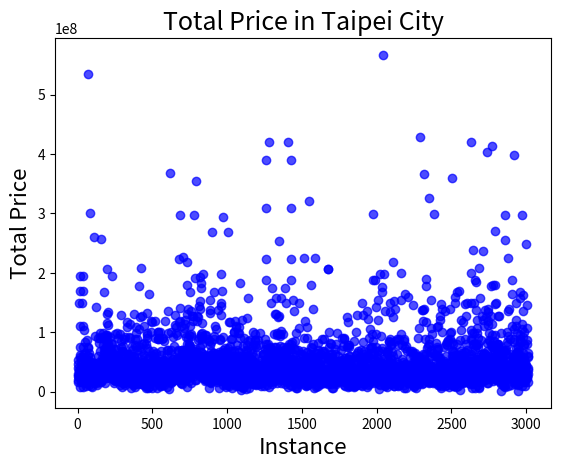

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
from matplotlib import rcParams

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

# 篩選台北市的資料
taipei_data = Dataset[Dataset['縣市別'] == '台北市']

# plt.figure(figsize=(10, 6))
plt.scatter(range(len(taipei_data)), taipei_data['總價'], color='blue', alpha=0.7)
plt.title("Total Price in Taipei City", fontsize=18)
plt.xlabel("Instance", fontsize=16)
plt.ylabel("Total Price", fontsize=16)

plt.show()

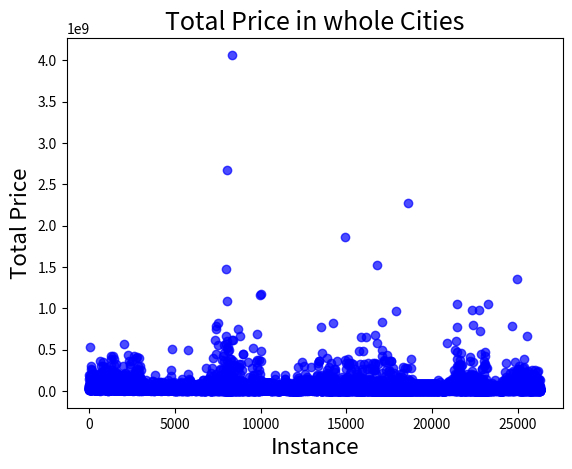

In [ ]:
plt.scatter(range(len(Dataset)), Dataset['總價'], color='blue', alpha=0.7)
plt.title("Total Price in whole Cities", fontsize=18)
plt.xlabel("Instance", fontsize=16)
plt.ylabel("Total Price", fontsize=16)

plt.show()

In [ ]:
# 把屬於 Outlier 的資料進行標記並新增Outlier欄位
Dataset["Outlier"] = Dataset.apply(lambda row: True if row["總價"] > 0.5e9 else False, axis=1)
print(Dataset["Outlier"].value_counts())

Dataset.head()

Outlier
False    26258
True        49
Name: count, dtype: int64


,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,樓層,車位,管理費,縣市別,格局(房),格局(廳),格局(衛),格局(室),類型_簡化,Outlier
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21,2.06,23.27,16.60,...,2樓/5樓,1,2778,台北市,2,2,2,0,華廈,False
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03,2.89,26.92,9.16,...,7樓/7樓,0,750,台北市,3,2,2,0,華廈,False
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,0.00,0.00,0.00,0.00,...,-1樓/8樓,0,2050,台北市,4,2,2,1,華廈,False
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27.00,0.00,0.00,3.02,...,B1-1樓/7樓,1,900,台北市,3,2,2,1,華廈,False
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87,0.75,8.62,6.83,...,4樓/7樓,0,3410,台北市,1,1,1,1,華廈,False


In [ ]:
# 把屬於 Outlier 的資料刪除
Undropped_Data = (Dataset["Outlier"] == False)
Dataset = Dataset[Undropped_Data]
print(Dataset["Outlier"].value_counts())
Dataset.head()

Outlier
False    26258
Name: count, dtype: int64


,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,樓層,車位,管理費,縣市別,格局(房),格局(廳),格局(衛),格局(室),類型_簡化,Outlier
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21,2.06,23.27,16.60,...,2樓/5樓,1,2778,台北市,2,2,2,0,華廈,False
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03,2.89,26.92,9.16,...,7樓/7樓,0,750,台北市,3,2,2,0,華廈,False
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,0.00,0.00,0.00,0.00,...,-1樓/8樓,0,2050,台北市,4,2,2,1,華廈,False
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27.00,0.00,0.00,3.02,...,B1-1樓/7樓,1,900,台北市,3,2,2,1,華廈,False
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87,0.75,8.62,6.83,...,4樓/7樓,0,3410,台北市,1,1,1,1,華廈,False


### 各個 attribute 的資料視覺化

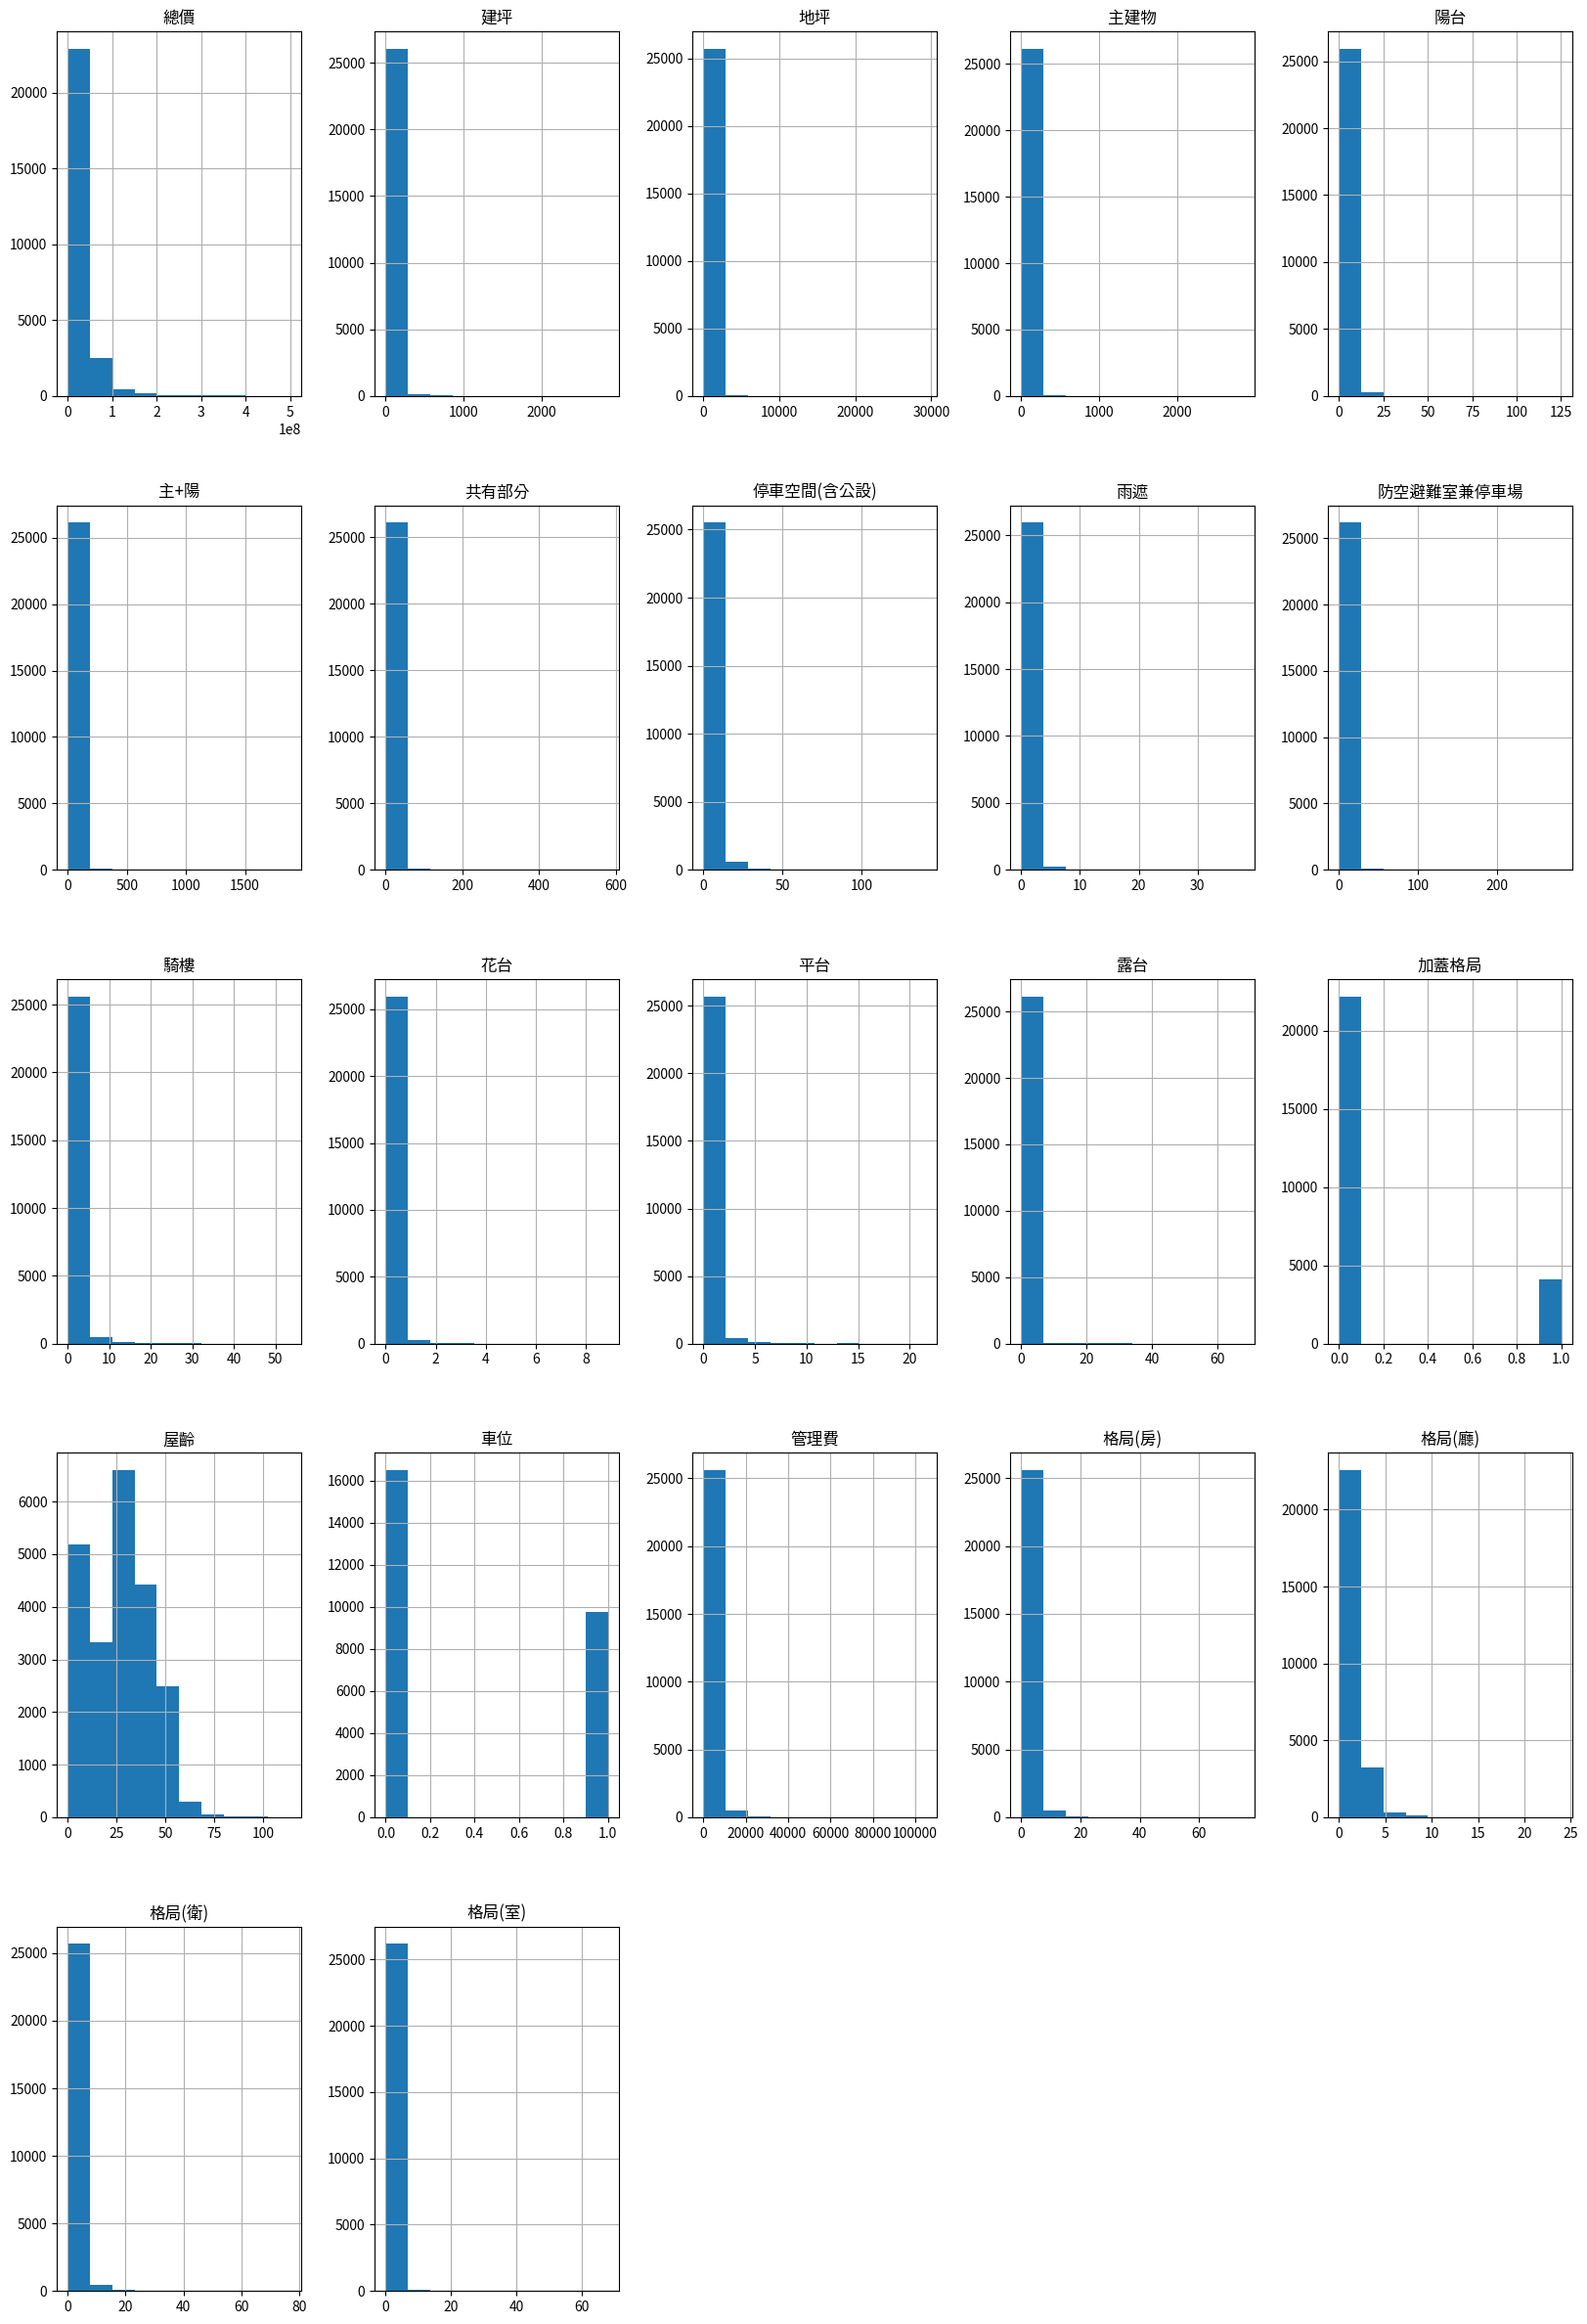

In [ ]:
Dataset.hist(figsize=(20,30))
plt.show()

<ipython-input-33-5a906fa17c7a>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset[col], kde=True, hist=True)
<ipython-input-33-5a906fa17c7a>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dataset[col], kde=True, hist=True)
<ipython-input-33-5a906fa17c7a>:14: UserWarning: 

`distplot` 

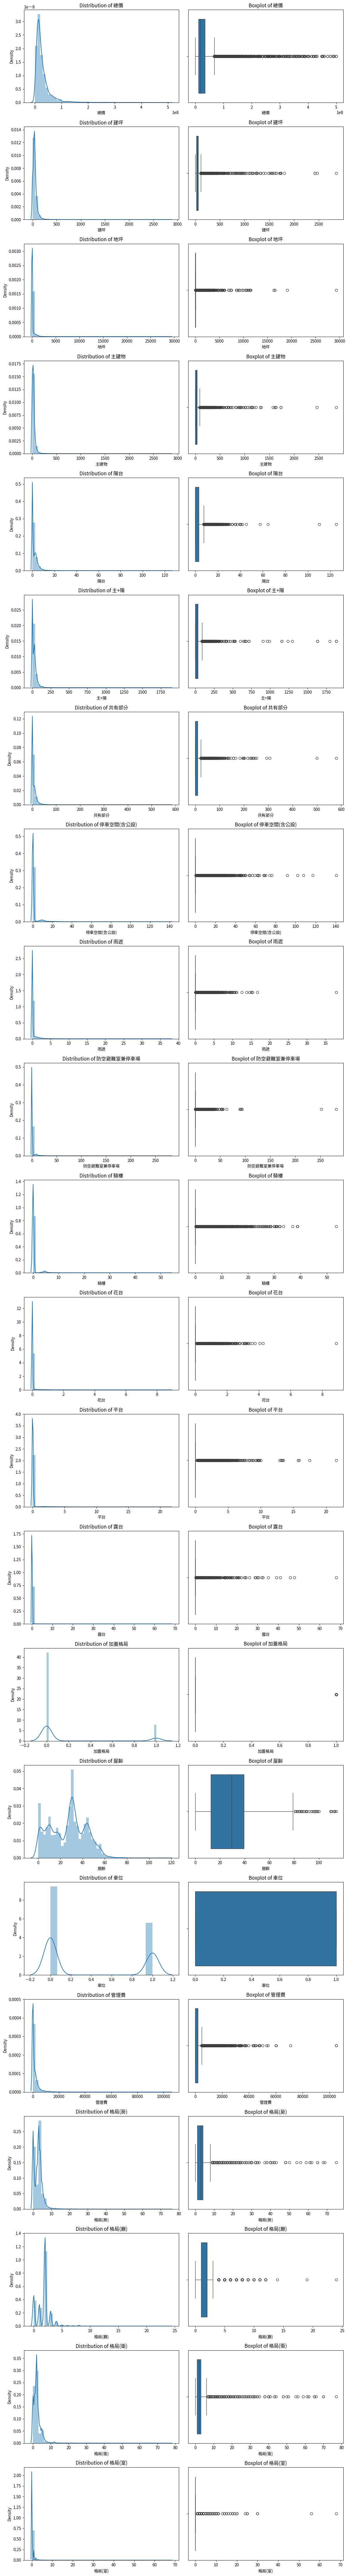

In [ ]:
import seaborn as sns
# Calculate rows needed based on the number of columns
numerical_data = Dataset.select_dtypes(include=['float64', 'int64'])
n_cols = len(numerical_data.columns)
n_rows = n_cols

plt.figure(figsize=(12, 4 * n_rows))

# Loop through each column in the numerical data
for i, col in enumerate(numerical_data.columns):
    # Create a subplot for the distribution plot
    plt.subplot(n_rows, 2, 2 * i + 1)
    # sns.histplot(numerical_data[col], kde=True, bins=30)
    sns.distplot(Dataset[col], kde=True, hist=True)
    plt.title(f'Distribution of {col}')

    # Create a subplot for the boxplot
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.boxplot(x=numerical_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

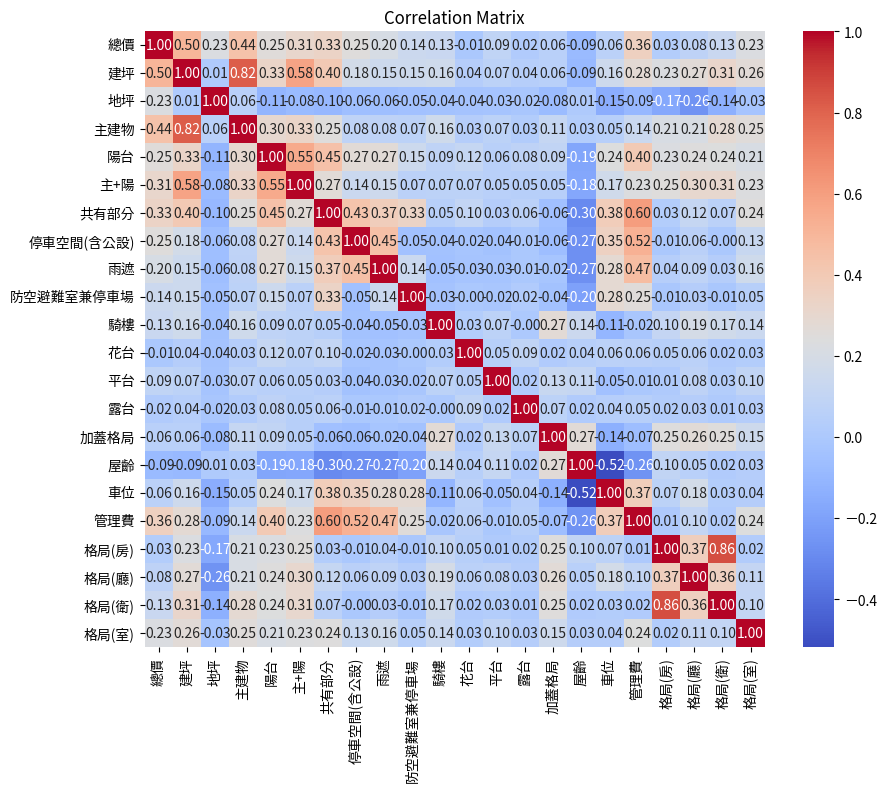

In [ ]:
import seaborn as sns

numeric_columns = Dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

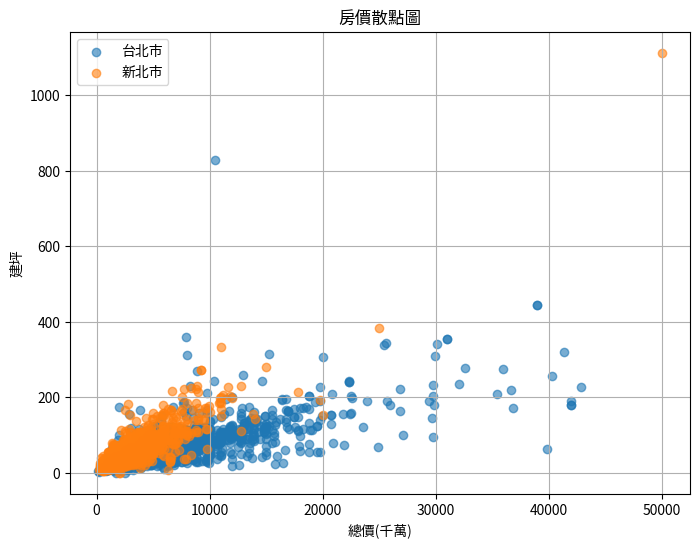

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))

selected_cities = ['台北市', '新北市']
for city in selected_cities:
   mask = Dataset['縣市別'] == city
   plt.scatter(Dataset[mask]['總價']/10000, Dataset[mask]['建坪'], label=city, alpha=0.6)

plt.xlabel('總價(千萬)')
plt.ylabel('建坪')
plt.title('房價散點圖')
plt.legend()
plt.grid(True)
plt.show()

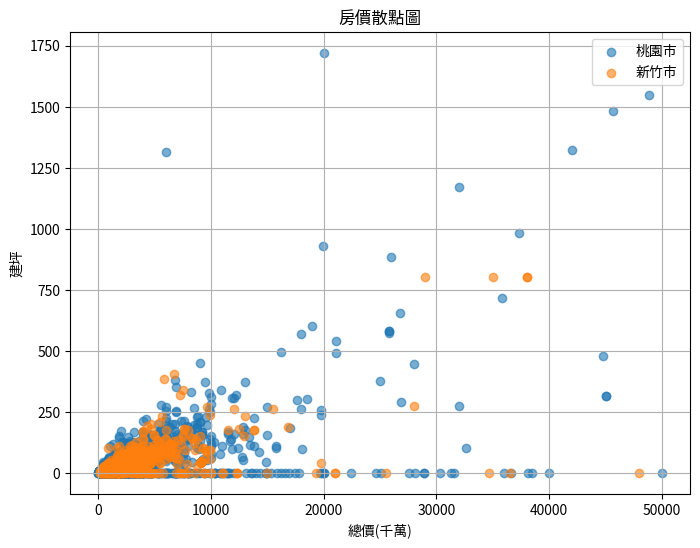

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))

selected_cities = ['桃園市', '新竹市']
for city in selected_cities:
   mask = Dataset['縣市別'] == city
   plt.scatter(Dataset[mask]['總價']/10000, Dataset[mask]['建坪'], label=city, alpha=0.6)

plt.xlabel('總價(千萬)')
plt.ylabel('建坪')
plt.title('房價散點圖')
plt.legend()
plt.grid(True)
plt.show()

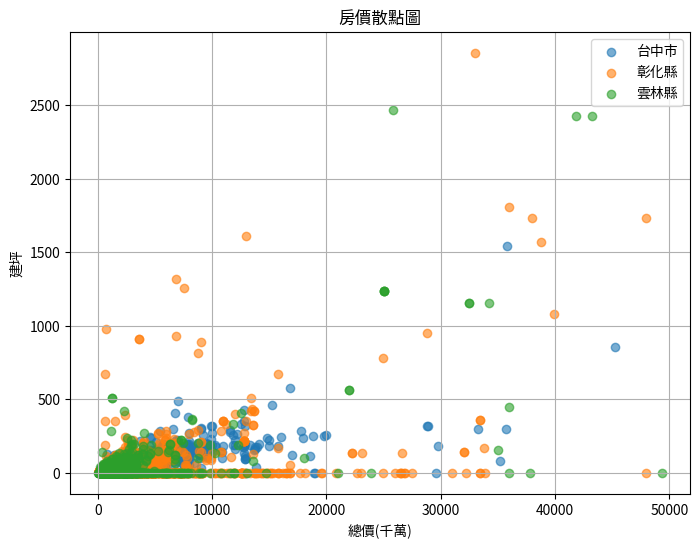

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))

selected_cities = ['台中市', '彰化縣', '雲林縣']
for city in selected_cities:
   mask = Dataset['縣市別'] == city
   plt.scatter(Dataset[mask]['總價']/10000, Dataset[mask]['建坪'], label=city, alpha=0.6)

plt.xlabel('總價(千萬)')
plt.ylabel('建坪')
plt.title('房價散點圖')
plt.legend()
plt.grid(True)
plt.show()

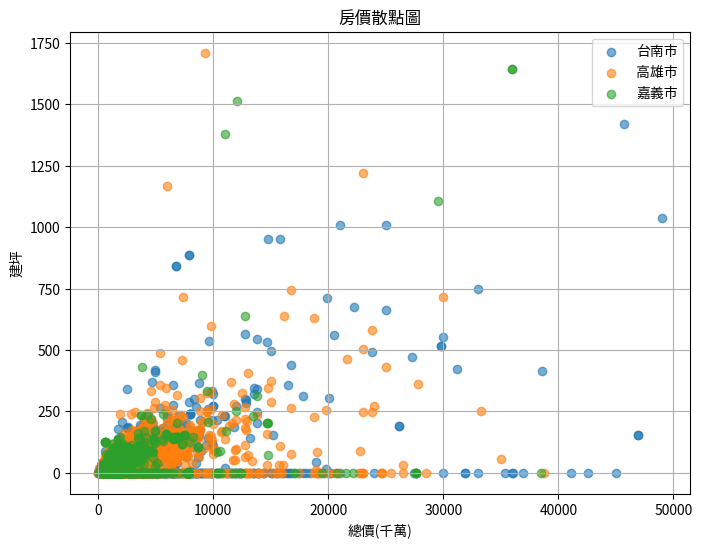

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))

selected_cities = ['台南市', '高雄市', '嘉義市']
for city in selected_cities:
   mask = Dataset['縣市別'] == city
   plt.scatter(Dataset[mask]['總價']/10000, Dataset[mask]['建坪'], label=city, alpha=0.6)

plt.xlabel('總價(千萬)')
plt.ylabel('建坪')
plt.title('房價散點圖')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# plt.figure(figsize=(25, 5))
# sns.pairplot(Dataset)
# plt.show()

### 把不需用到的欄位 drop 掉

In [ ]:
Dataset.head()

,標題,總價,地址,建坪,建坪單價,地坪,主建物,陽台,主+陽,共有部分,...,樓層,車位,管理費,縣市別,格局(房),格局(廳),格局(衛),格局(室),類型_簡化,Outlier
0,信義安和典藏兩房車位,39600000,台北市大安區文昌街,40.57,本物件含車位，詳洽經紀人員,2.78,21.21,2.06,23.27,16.60,...,2樓/5樓,1,2778,台北市,2,2,2,0,華廈,False
1,★近捷運電梯高樓前後陽台,26600000,台北市內湖區康寧路三段,36.09,73.70 萬/坪,12.35,24.03,2.89,26.92,9.16,...,7樓/7樓,0,750,台北市,3,2,2,0,華廈,False
2,日光４房大空間,15800000,台北市北投區行義路,37.37,本物件含加蓋，詳洽經紀人員,7.18,0.00,0.00,0.00,0.00,...,-1樓/8樓,0,2050,台北市,4,2,2,1,華廈,False
3,稀有海華一樓帶車位,46800000,台北市信義區忠孝東路五段,65.02,82.13 萬/坪(扣除車位價及車坪),13.63,27.00,0.00,0.00,3.02,...,B1-1樓/7樓,1,900,台北市,3,2,2,1,華廈,False
4,敦南ＷＯＷ邊間精品小豪宅,29250000,台北市大安區安和路二段,17.05,本物件含加蓋，詳洽經紀人員,3.72,7.87,0.75,8.62,6.83,...,4樓/7樓,0,3410,台北市,1,1,1,1,華廈,False


In [ ]:
Dataset = Dataset.drop(columns=["標題","地址","建坪單價","類型","格局","樓層","Outlier"])
Dataset = Dataset.drop(columns=["露台","花台","平台"])
Dataset.head()

,總價,建坪,地坪,主建物,陽台,主+陽,共有部分,停車空間(含公設),雨遮,防空避難室兼停車場,...,加蓋格局,屋齡,車位,管理費,縣市別,格局(房),格局(廳),格局(衛),格局(室),類型_簡化
0,39600000,40.57,2.78,21.21,2.06,23.27,16.60,0.0,0.00,0.00,...,0,28.5,1,2778,台北市,2,2,2,0,華廈
1,26600000,36.09,12.35,24.03,2.89,26.92,9.16,0.0,0.00,0.00,...,0,30.1,0,750,台北市,3,2,2,0,華廈
2,15800000,37.37,7.18,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,1,43.3,0,2050,台北市,4,2,2,1,華廈
3,46800000,65.02,13.63,27.00,0.00,0.00,3.02,0.0,0.00,12.91,...,0,40.0,1,900,台北市,3,2,2,1,華廈
4,29250000,17.05,3.72,7.87,0.75,8.62,6.83,0.0,1.59,0.00,...,1,3.8,0,3410,台北市,1,1,1,1,華廈


## 進行 One-Hot Encoding

In [ ]:
numerical_attributes = []
categorical_attributes = []

for attr in Dataset.columns:
  #print(Dataset[attr].dtypes)

  attr_type = Dataset[attr].dtypes
  if attr_type == "float64" or attr_type == "int64":
    numerical_attributes.append(attr)
  elif attr_type == "object":
    categorical_attributes.append(attr)

numerical_attributes.remove("總價")

print(f"數值型的 Attributes 有: {numerical_attributes}")
print(f"類別型的 Attributes 有: {categorical_attributes}")

數值型的 Attributes 有: ['建坪', '地坪', '主建物', '陽台', '主+陽', '共有部分', '停車空間(含公設)', '雨遮', '防空避難室兼停車場', '騎樓', '加蓋格局', '屋齡', '車位', '管理費', '格局(房)', '格局(廳)', '格局(衛)', '格局(室)']
類別型的 Attributes 有: ['縣市別', '類型_簡化']


In [ ]:
# pandas 的 get_dummies 可以迅速的對 Dataset 中屬於類別型的欄位進行 One-Hot Encoding
print(f"One-Hot Encoding 前有 {Dataset.shape[1]} 個欄位")
One_Hot_Dataset = pd.get_dummies(Dataset)
print(f"One-Hot Encoding 後有 {One_Hot_Dataset.shape[1]} 個欄位")
One_Hot_Dataset.head()

One-Hot Encoding 前有 21 個欄位
One-Hot Encoding 後有 42 個欄位


,總價,建坪,地坪,主建物,陽台,主+陽,共有部分,停車空間(含公設),雨遮,防空避難室兼停車場,...,類型_簡化_別墅,類型_簡化_單售車位,類型_簡化_土地,類型_簡化_大樓,類型_簡化_套房,類型_簡化_店面,類型_簡化_廠房,類型_簡化_華廈,類型_簡化_辦公,類型_簡化_透天
0,39600000,40.57,2.78,21.21,2.06,23.27,16.60,0.0,0.00,0.00,...,False,False,False,False,False,False,False,True,False,False
1,26600000,36.09,12.35,24.03,2.89,26.92,9.16,0.0,0.00,0.00,...,False,False,False,False,False,False,False,True,False,False
2,15800000,37.37,7.18,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,False,False,False,False,False,False,False,True,False,False
3,46800000,65.02,13.63,27.00,0.00,0.00,3.02,0.0,0.00,12.91,...,False,False,False,False,False,False,False,True,False,False
4,29250000,17.05,3.72,7.87,0.75,8.62,6.83,0.0,1.59,0.00,...,False,False,False,False,False,False,False,True,False,False


## 資料切分 (訓練集/測試集)

In [ ]:
from sklearn.model_selection import train_test_split
# 區分 X 與 Y
Y = One_Hot_Dataset["總價"]
X = One_Hot_Dataset.drop(["總價"], axis=1)

# 進行資料集切分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(21006, 41)
(21006,)
(5252, 41)
(5252,)


In [ ]:
print(One_Hot_Dataset.head())

         總價     建坪     地坪    主建物    陽台    主+陽   共有部分  停車空間(含公設)    雨遮  \
0  39600000  40.57   2.78  21.21  2.06  23.27  16.60        0.0  0.00   
1  26600000  36.09  12.35  24.03  2.89  26.92   9.16        0.0  0.00   
2  15800000  37.37   7.18   0.00  0.00   0.00   0.00        0.0  0.00   
3  46800000  65.02  13.63  27.00  0.00   0.00   3.02        0.0  0.00   
4  29250000  17.05   3.72   7.87  0.75   8.62   6.83        0.0  1.59   

   防空避難室兼停車場  ...  類型_簡化_別墅  類型_簡化_單售車位  類型_簡化_土地  類型_簡化_大樓  類型_簡化_套房  \
0       0.00  ...     False       False     False     False     False   
1       0.00  ...     False       False     False     False     False   
2       0.00  ...     False       False     False     False     False   
3      12.91  ...     False       False     False     False     False   
4       0.00  ...     False       False     False     False     False   

   類型_簡化_店面  類型_簡化_廠房  類型_簡化_華廈  類型_簡化_辦公  類型_簡化_透天  
0     False     False      True     False     False  
1     False   

## Feature Scaling

In [ ]:
Y

,總價
0,39600000
1,26600000
2,15800000
3,46800000
4,29250000
...,...
26302,8680000
26303,5980000
26304,62800000
26305,11980000


In [ ]:
X

,建坪,地坪,主建物,陽台,主+陽,共有部分,停車空間(含公設),雨遮,防空避難室兼停車場,騎樓,...,類型_簡化_別墅,類型_簡化_單售車位,類型_簡化_土地,類型_簡化_大樓,類型_簡化_套房,類型_簡化_店面,類型_簡化_廠房,類型_簡化_華廈,類型_簡化_辦公,類型_簡化_透天
0,40.57,2.78,21.21,2.06,23.27,16.60,0.0,0.00,0.00,0.0,...,False,False,False,False,False,False,False,True,False,False
1,36.09,12.35,24.03,2.89,26.92,9.16,0.0,0.00,0.00,0.0,...,False,False,False,False,False,False,False,True,False,False
2,37.37,7.18,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,False,False,False,False,False,False,False,True,False,False
3,65.02,13.63,27.00,0.00,0.00,3.02,0.0,0.00,12.91,0.0,...,False,False,False,False,False,False,False,True,False,False
4,17.05,3.72,7.87,0.75,8.62,6.83,0.0,1.59,0.00,0.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,0.00,434.30,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,False,False,True,False,False,False,False,False,False,False
26303,24.96,6.31,21.84,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,False,False,False,False,False,False,False,False,False,False
26304,0.00,1395.81,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,False,False,True,False,False,False,False,False,False,False
26305,35.74,24.42,35.74,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 取出 Training Dataset 和 Testing Dataset 的數值型資料
X_train_numerical = X_train[numerical_attributes]
X_test_numerical = X_test[numerical_attributes]

x_scaler = MinMaxScaler().fit(X_train_numerical)

# 使用 scaler 對 training 與 testing dataset 的數值型資料進行 transform
X_train_numerical_trans = x_scaler.transform(X_train_numerical)
X_test_numerical_trans = x_scaler.transform(X_test_numerical)

# 對數值型欄位的資料進行覆寫
X_train[numerical_attributes] = X_train_numerical_trans
X_test[numerical_attributes] = X_test_numerical_trans

# 針對 Y 做 Feature Scaling
y_scaler = StandardScaler().fit(Y_train.to_numpy().reshape(-1,1))
Y_train_trans = y_scaler.transform(Y_train.to_numpy().reshape(-1,1))
Y_test_trans = y_scaler.transform(Y_test.to_numpy().reshape(-1,1))

## 觀察p-value、R-square、ROC(待定)

In [ ]:
import numpy as np
# 去除NaN值
# X_series = pd.Series(X)
# Dataset.replace('',np.nan, inplace=True)
# Dataset.dropna(axis=0, inplace=True)
# Dataset.reset_index(drop=True,inplace=True)

# print(Dataset)
# print(Y)

In [ ]:
print(X.columns)
print(X.dtypes)

Index(['建坪', '地坪', '主建物', '陽台', '主+陽', '共有部分', '停車空間(含公設)', '雨遮', '防空避難室兼停車場',
       '騎樓', '加蓋格局', '屋齡', '車位', '管理費', '格局(房)', '格局(廳)', '格局(衛)', '格局(室)',
       '縣市別_台中市', '縣市別_台北市', '縣市別_台南市', '縣市別_嘉義市', '縣市別_彰化縣', '縣市別_新北市',
       '縣市別_新竹市', '縣市別_桃園市', '縣市別_雲林縣', '縣市別_高雄市', '類型_簡化_倉庫', '類型_簡化_公寓',
       '類型_簡化_其它', '類型_簡化_別墅', '類型_簡化_單售車位', '類型_簡化_土地', '類型_簡化_大樓',
       '類型_簡化_套房', '類型_簡化_店面', '類型_簡化_廠房', '類型_簡化_華廈', '類型_簡化_辦公', '類型_簡化_透天'],
      dtype='object')
建坪            float64
地坪            float64
主建物           float64
陽台            float64
主+陽           float64
共有部分          float64
停車空間(含公設)     float64
雨遮            float64
防空避難室兼停車場     float64
騎樓            float64
加蓋格局            int64
屋齡            float64
車位              int64
管理費             int64
格局(房)           int64
格局(廳)           int64
格局(衛)           int64
格局(室)           int64
縣市別_台中市          bool
縣市別_台北市          bool
縣市別_台南市          bool
縣市別_嘉義市          bool
縣市別_彰化縣          bool
縣市別_新北市          boo

In [ ]:
# X = Dataset.drop(['總價', '縣市別', '類型_簡化'], axis=1)

In [ ]:
# print(f"X shape: {X.shape}")
# print(f"Y shape: {Y.shape}")

In [ ]:
X = pd.DataFrame(X).fillna(0).to_numpy()  # 若 `X` 是 DataFrame
# Y = pd.Series(Y).fillna(0).to_numpy()    # 若 `Y` 是 Series

In [ ]:
# print(pd.Series.value_counts(Y))

In [ ]:
# # from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# # Y = One_Hot_Dataset["總價"]
# # X = One_Hot_Dataset.drop(["總價"], axis=1, inplace=True)
# # print(pd.Series.value_counts(Y))
# # X = pd.DataFrame(X).fillna(0).to_numpy()  # 若 `X` 是 DataFrame
# # Y = pd.Series(Y).fillna(0).to_numpy()    # 若 `Y` 是 Series

# # X = X.astype(float)
# smote = SMOTE(random_state=42, k_neighbors=1)
# X_smote, Y_smote = smote.fit_resample(X, Y)
# print(pd.Series.value_counts(Y_smote))
# X_smote = X_smote.reset_index(drop=True)
# Y_smote = Y_smote.reset_index(drop=True)

## 回歸模型

In [ ]:
print(X_train.isnull().sum())

建坪               0
地坪             349
主建物              0
陽台               0
主+陽              0
共有部分             0
停車空間(含公設)        0
雨遮               0
防空避難室兼停車場        0
騎樓               0
加蓋格局             0
屋齡            3099
車位               0
管理費              0
格局(房)            0
格局(廳)            0
格局(衛)            0
格局(室)            0
縣市別_台中市          0
縣市別_台北市          0
縣市別_台南市          0
縣市別_嘉義市          0
縣市別_彰化縣          0
縣市別_新北市          0
縣市別_新竹市          0
縣市別_桃園市          0
縣市別_雲林縣          0
縣市別_高雄市          0
類型_簡化_倉庫         0
類型_簡化_公寓         0
類型_簡化_其它         0
類型_簡化_別墅         0
類型_簡化_單售車位       0
類型_簡化_土地         0
類型_簡化_大樓         0
類型_簡化_套房         0
類型_簡化_店面         0
類型_簡化_廠房         0
類型_簡化_華廈         0
類型_簡化_辦公         0
類型_簡化_透天         0
dtype: int64


In [ ]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

In [ ]:
print(X_train.isnull().sum().sum())  # 應返回 0

0


In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (21006, 41)
Y_train shape: (21006,)


### 預測

#### 多項式(LR)回歸

In [ ]:
# print(X_train.columns)

In [ ]:
# import statsmodels.api as sm

# # 在特徵中加入常數項，以便模型包含截距項
# X_train_with_intercept = sm.add_constant(X_train)

# # 建立並擬合回歸模型
# model = sm.OLS(Y_train, X_train_with_intercept).fit()

# # 輸出詳細的回歸結果
# print(model.summary())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 訓練多項式回歸模型
LR_Algorithm = LinearRegression()
LR_Model = LR_Algorithm.fit(X_train, Y_train)
# 使用訓練的多項式回歸模型進行預測
LR_Predictions = LR_Model.predict(X_test)

#### Ridge回歸

In [ ]:
# 訓練Ridge回歸模型
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, Y_train)
# 使用訓練的Ridge回歸模型進行預測
y_test_pred_ridge = ridge.predict(X_test)

#### Lasso回歸

In [ ]:
# 訓練Lasso回歸模型
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, Y_train)
# 使用訓練的Lasso回歸模型進行預測
y_test_pred_lasso = lasso.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.246e+18, tolerance: 3.034e+15
  model = cd_fast.enet_coordinate_descent(


#### SVR

In [ ]:
from sklearn.svm import SVR
SVR_Algorithm = SVR(kernel="rbf", C=10, gamma=0.1)
SVR_Model = SVR_Algorithm.fit(X_train, Y_train_trans.reshape(-1))
# 使用訓練的SVR模型進行預測
SVR_Predictions = SVR_Model.predict(X_test)
SVR_Predictions = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))

# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'gamma': [0.001, 0.01, 0.1, 1, 10],
#     'kernel': ['rbf', 'linear']
# }

# grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, Y_train)

# # 最佳參數
# print("Best Parameters:", grid_search.best_params_)

# 使用最佳參數進行模型訓練
# SVR_Algorithm = grid_search.best_estimator_
# SVR_Model = SVR_Algorithm.fit(X_train, Y_train_trans.reshape(-1))
# SVR_Predictions = SVR_Model.predict(X_test)
# SVR_Predictions = y_scaler.inverse_transform(SVR_Predictions.reshape(-1,1))

#### 隨機森林回歸

In [ ]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X_train, Y_train)
# 使用訓練的隨機森林回歸模型進行預測
random_prediction = regressor.predict(X_test)

#### XGBoost(初步)



In [ ]:
!pip install xgboost==1.6.2

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import xgboost as xgb

# 自定義評估指標 (MSE)
# mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# # XGBoost超參數調整
# xgb_param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 200, 300]
# }

# 定義回歸模型
# xgb_model = xgb.XGBRegressor(random_state=42)
# xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=10, scoring='neg_mean_squared_error')
xgb_model = xgb.XGBRegressor(learning_rate=0.05, max_depth=10, n_estimators=200, subsample=0.7, random_state=42)
# xgb_model = xgb.XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, Y_train)
# xgb_grid_search.fit(X_train, Y_train)

# 使用訓練的XGB回歸模型進行預測
xgb_pred = xgb_model.predict(X_test)

In [ ]:
# print("Score: ",xgb_model.score(Y_test, xgb_pred))

In [ ]:
# # 打印最佳參數與最佳分數
# print("Best parameters:", xgb_grid_search.best_params_)
# print("Best MSE:", -xgb_grid_search.best_score_)

#### 決策樹

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 建立DecisionTreeRegressor模型
decisionTreeModel = DecisionTreeRegressor(criterion = 'squared_error', max_depth=5, splitter='best', random_state=42)
# 使用訓練資料訓練模型
decisionTreeModel.fit(X_train, Y_train)
# 使用訓練資料預測
decided_predicted = decisionTreeModel.predict(X_test)

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# 建立KNN模型
KNN = KNeighborsRegressor(n_neighbors=3)
# 使用訓練資料訓練模型
KNN.fit(X_train, Y_train)
# 使用訓練資料預測
K_predicted= KNN.predict(X_test)

### 預測比較圖

#### 多項式回歸預測圖

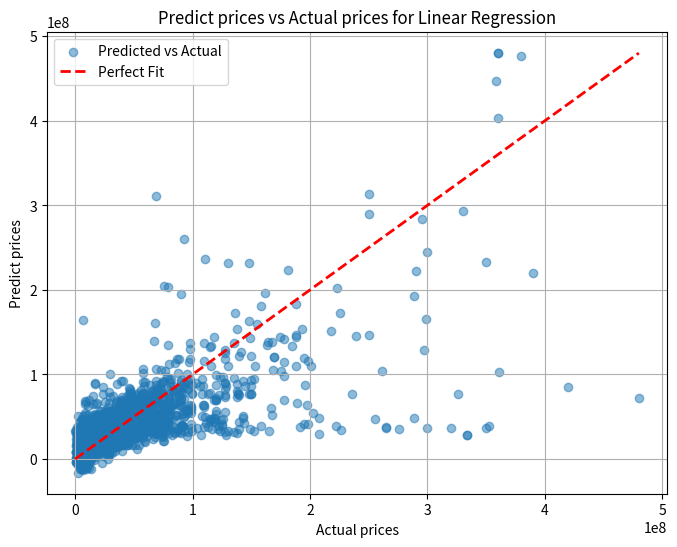

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, LR_Predictions, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual prices')
plt.ylabel('Predict prices')
plt.title('Predict prices vs Actual prices for Linear Regression')
plt.legend()
plt.grid()
plt.show()

#### Ridge回歸預測圖

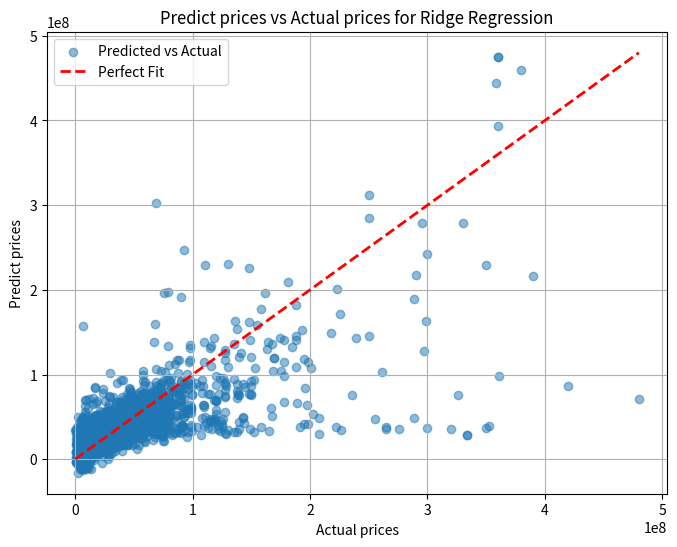

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_test_pred_ridge, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual prices')
plt.ylabel('Predict prices')
plt.title('Predict prices vs Actual prices for Ridge Regression')
plt.legend()
plt.grid()
plt.show()

#### Lasso回歸預測圖

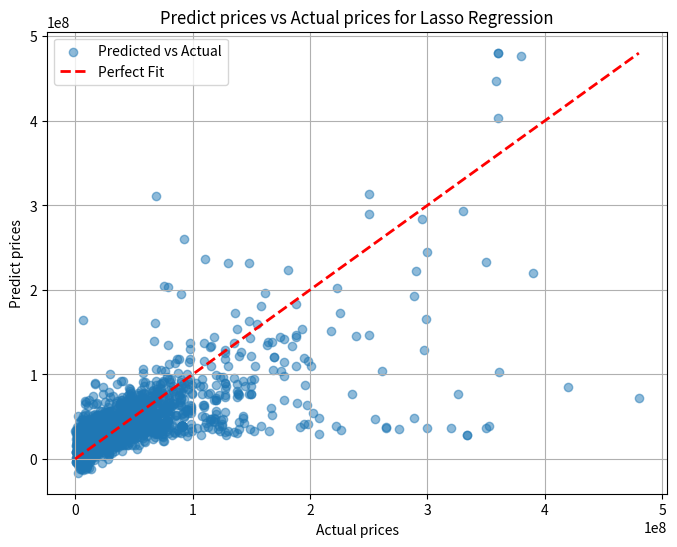

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_test_pred_lasso, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual prices')
plt.ylabel('Predict prices')
plt.title('Predict prices vs Actual prices for Lasso Regression')
plt.legend()
plt.grid()
plt.show()

#### SVR預測圖

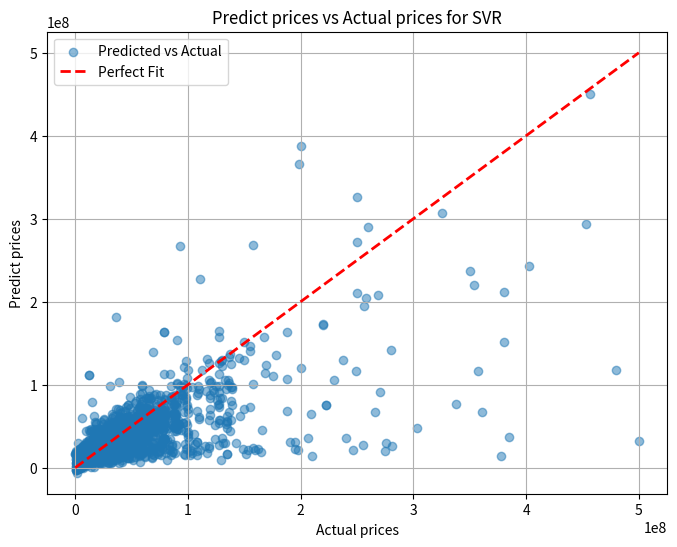

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, SVR_Predictions, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual prices')
plt.ylabel('Predict prices')
plt.title('Predict prices vs Actual prices for SVR')
plt.legend()
plt.grid()
plt.show()

#### 隨機森林回歸預測圖

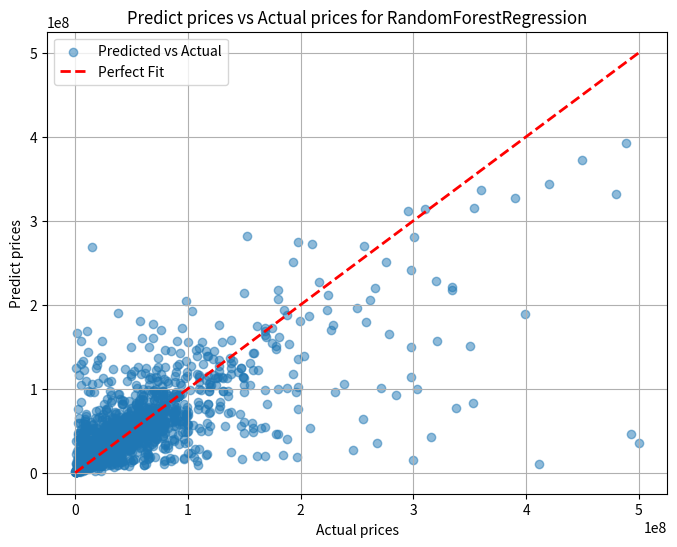

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, random_prediction, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual prices')
plt.ylabel('Predict prices')
plt.title('Predict prices vs Actual prices for RandomForestRegression')
plt.legend()
plt.grid()
plt.show()

#### XGBoost回歸圖

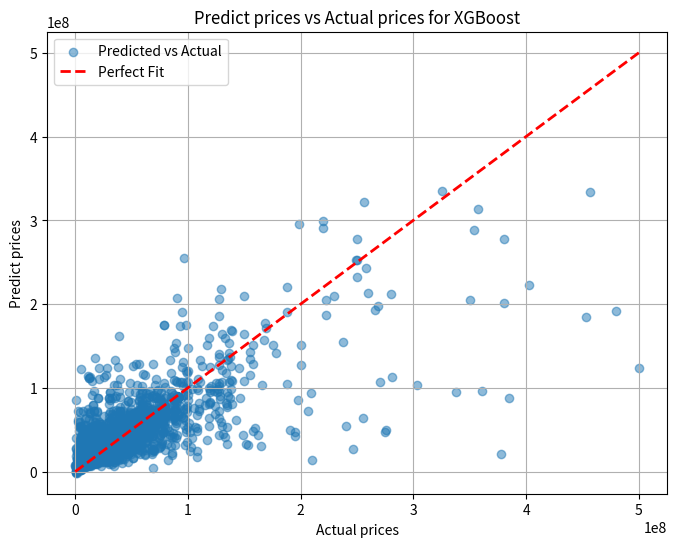

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, xgb_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual prices')
plt.ylabel('Predict prices')
plt.title('Predict prices vs Actual prices for XGBoost')
plt.legend()
plt.grid()
plt.show()

#### 決策樹回歸圖

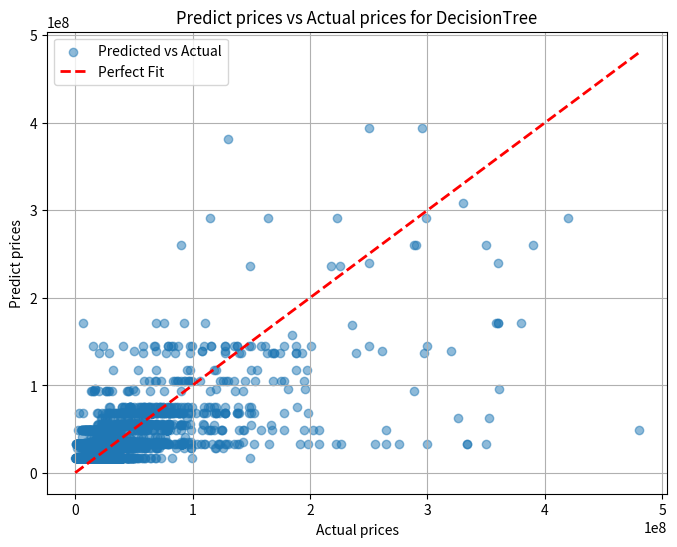

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, decided_predicted, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual prices')
plt.ylabel('Predict prices')
plt.title('Predict prices vs Actual prices for DecisionTree')
plt.legend()
plt.grid()
plt.show()

#### KNN回歸圖

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, xgb_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual prices')
plt.ylabel('Predict prices')
plt.title('Predict prices vs Actual prices for XGBoost')
plt.legend()
plt.grid()
plt.show()

## 評估模型

### 多項式模型評估

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 計算各指標評估模型成效
mse = mean_squared_error(Y_test, LR_Predictions)
print(f"MSE: {mse}")
mae = mean_absolute_error(Y_test, LR_Predictions)
print(f"MAE: {mae}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
r2 = r2_score(Y_test, LR_Predictions)
print(f"R2 Score: {r2}")

MSE: 639968625509557.8
MAE: 12425763.165784862
RMSE: 25297601.180933297
R2 Score: 0.5171570763668696


### Ridge模型評估

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 計算各指標評估模型成效
mse = mean_squared_error(Y_test, y_test_pred_ridge)
print(f"MSE: {mse}")
mae = mean_absolute_error(Y_test, y_test_pred_ridge)
print(f"MAE: {mae}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
r2 = r2_score(Y_test, y_test_pred_ridge)
print(f"R2 Score: {r2}")

MSE: 638817115235765.1
MAE: 12438930.499285012
RMSE: 25274831.655933242
R2 Score: 0.5180258667497558


### Lasso模型評估

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 計算各指標評估模型成效
mse = mean_squared_error(Y_test, y_test_pred_lasso)
print(f"MSE: {mse}")
mae = mean_absolute_error(Y_test, y_test_pred_lasso)
print(f"MAE: {mae}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
r2 = r2_score(Y_test, y_test_pred_lasso)
print(f"R2 Score: {r2}")

MSE: 639968635818623.5
MAE: 12425756.907081988
RMSE: 25297601.384689093
R2 Score: 0.5171570685888954


### SVR模型評估

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 計算各指標評估模型成效
mse = mean_squared_error(Y_test, SVR_Predictions)
print(f"MSE: {mse}")
mae = mean_absolute_error(Y_test, SVR_Predictions)
print(f"MAE: {mae}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
r2 = r2_score(Y_test,random_prediction)
print(f"R2 Score: {r2}")

MSE: 633451650276686.1
MAE: 9911693.755486801
RMSE: 25168465.393755857
R2 Score: 0.6292496576360667


### 隨機森林回歸模型評估

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 計算各指標評估模型成效
mse = mean_squared_error(Y_test, random_prediction)
print(f"MSE: {mse}")
mae = mean_absolute_error(Y_test, random_prediction)
print(f"MAE: {mae}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
r2 = r2_score(Y_test,random_prediction)
print(f"R2 Score: {r2}")

MSE: 491399118422461.9
MAE: 8546526.402607592
RMSE: 22167523.95786372
R2 Score: 0.6292496576360667


### XGBoost回歸模型評估

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 計算評估指標
mse = mean_squared_error(Y_test, xgb_pred)
mae = mean_absolute_error(Y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, xgb_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MSE: 493796282335232.0
MAE: 9237018.0
RMSE: 22221527.45279298
R2 Score: 0.6194918155670166


### 決策樹回歸模型評估

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 計算評估指標
mse = mean_squared_error(Y_test, decided_predicted)
mae = mean_absolute_error(Y_test, decided_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, decided_predicted)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MSE: 696535989692696.6
MAE: 13688757.791504888
RMSE: 26391968.28000323
R2 Score: 0.4744781849092463


## 特徵重要度

In [ ]:
# 獲取標準化係數
feature_importance = pd.DataFrame({
    '特徵': X_test.columns,
    '重要性': LR_Algorithm.coef_
})
feature_importance = feature_importance.sort_values('重要性', ascending=False)
print(feature_importance)

            特徵           重要性
1           地坪  3.648334e+08
0           建坪  2.867996e+08
2          主建物  2.194724e+08
13         管理費  2.155981e+08
4          主+陽  1.410185e+08
8    防空避難室兼停車場  1.364064e+08
16       格局(衛)  9.980323e+07
6    停車空間(含公設)  9.053407e+07
5         共有部分  7.752428e+07
15       格局(廳)  4.721260e+07
37    類型_簡化_廠房  4.235176e+07
9           騎樓  2.965029e+07
7           雨遮  2.891073e+07
33    類型_簡化_土地  2.713071e+07
19     縣市別_台北市  2.364593e+07
17       格局(室)  1.374051e+07
24     縣市別_新竹市  1.252203e+07
36    類型_簡化_店面  9.153704e+06
31    類型_簡化_別墅  6.864392e+06
30    類型_簡化_其它  6.036015e+06
23     縣市別_新北市  4.054528e+06
40    類型_簡化_透天  9.169735e+05
10        加蓋格局  3.678429e+05
11          屋齡 -2.579824e+05
25     縣市別_桃園市 -5.500137e+05
3           陽台 -1.540387e+06
18     縣市別_台中市 -1.712327e+06
27     縣市別_高雄市 -2.067949e+06
12          車位 -2.131722e+06
21     縣市別_嘉義市 -3.737521e+06
20     縣市別_台南市 -4.098231e+06
32  類型_簡化_單售車位 -5.359383e+06
35    類型_簡化_套房 -5.885747e+06
34    類型_簡化_大樓

In [ ]:
# 獲取標準化係數
feature_importance = pd.DataFrame({
    '特徵': X_test.columns,
    '重要性': regressor.feature_importances_
})
feature_importance = feature_importance.sort_values('重要性', ascending=False)
print(feature_importance)

            特徵           重要性
0           建坪  3.669344e-01
1           地坪  3.087636e-01
19     縣市別_台北市  6.708713e-02
11          屋齡  4.454792e-02
13         管理費  2.777088e-02
2          主建物  2.502101e-02
9           騎樓  1.370696e-02
36    類型_簡化_店面  1.137925e-02
4          主+陽  1.117919e-02
24     縣市別_新竹市  9.804797e-03
22     縣市別_彰化縣  8.507969e-03
3           陽台  8.436760e-03
5         共有部分  8.218963e-03
25     縣市別_桃園市  7.884100e-03
14       格局(房)  7.459193e-03
20     縣市別_台南市  7.418837e-03
26     縣市別_雲林縣  7.112579e-03
16       格局(衛)  6.918254e-03
15       格局(廳)  6.736372e-03
27     縣市別_高雄市  5.554303e-03
21     縣市別_嘉義市  4.614626e-03
37    類型_簡化_廠房  3.812805e-03
17       格局(室)  3.807697e-03
6    停車空間(含公設)  3.688304e-03
23     縣市別_新北市  3.677195e-03
10        加蓋格局  2.902636e-03
18     縣市別_台中市  2.559967e-03
8    防空避難室兼停車場  2.250753e-03
12          車位  2.142750e-03
7           雨遮  2.047531e-03
39    類型_簡化_辦公  1.942559e-03
33    類型_簡化_土地  1.830845e-03
31    類型_簡化_別墅  1.361830e-03
30    類型_簡化_其它

In [ ]:
# 獲取標準化係數
feature_importance = pd.DataFrame({
    '特徵': X_test.columns,
    '重要性': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('重要性', ascending=False)
print(feature_importance)

            特徵       重要性
19     縣市別_台北市  0.305860
0           建坪  0.085356
28    類型_簡化_倉庫  0.055343
33    類型_簡化_土地  0.042467
37    類型_簡化_廠房  0.029240
36    類型_簡化_店面  0.026168
24     縣市別_新竹市  0.025662
21     縣市別_嘉義市  0.025073
13         管理費  0.024607
30    類型_簡化_其它  0.023604
1           地坪  0.023446
22     縣市別_彰化縣  0.021522
27     縣市別_高雄市  0.021060
9           騎樓  0.018214
26     縣市別_雲林縣  0.018033
25     縣市別_桃園市  0.017498
20     縣市別_台南市  0.017023
11          屋齡  0.016144
39    類型_簡化_辦公  0.015496
23     縣市別_新北市  0.014951
14       格局(房)  0.014379
2          主建物  0.013195
18     縣市別_台中市  0.013171
31    類型_簡化_別墅  0.012233
10        加蓋格局  0.012112
4          主+陽  0.012056
12          車位  0.011568
6    停車空間(含公設)  0.010493
3           陽台  0.009243
15       格局(廳)  0.008883
17       格局(室)  0.008736
16       格局(衛)  0.008033
29    類型_簡化_公寓  0.007800
5         共有部分  0.006960
8    防空避難室兼停車場  0.005639
7           雨遮  0.005068
34    類型_簡化_大樓  0.004732
40    類型_簡化_透天  0.004619
38    類型_簡化_華廈  0.002584


In [ ]:
# feature_importance = xgb_model.feature_importances_

# # original_columns = list(X_1.columns)
# feature_importance_df = pd.DataFrame({
#         'Feature': X.columns,
#         'Importance': xgb_model.feature_importance
#     })
# # for i in range(0,len(important_df)):
# #     important_df['Important'][i] = important_df['Important'][i] / 10
# important_df = feature_importance_df.sort_values(by='Important', ascending=False)

# print('Feature Importance Ranking:')
# important_df

### K-means 分群

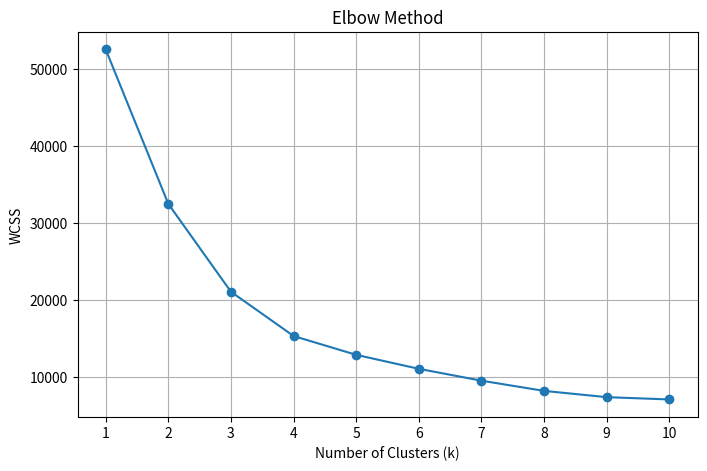

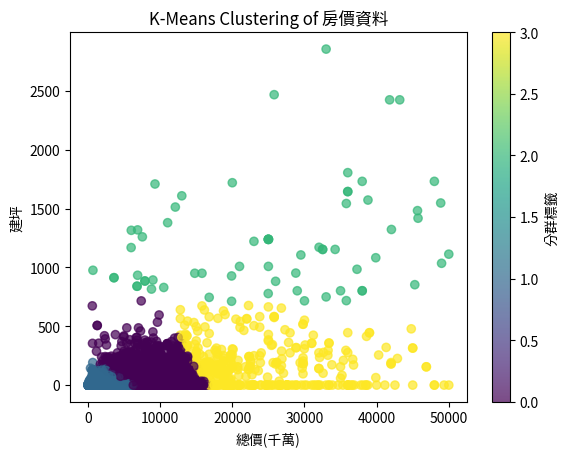

             總價     建坪       地坪    主建物    陽台    主+陽   共有部分  停車空間(含公設)    雨遮  \
0      39600000  40.57     2.78  21.21  2.06  23.27  16.60        0.0  0.00   
1      26600000  36.09    12.35  24.03  2.89  26.92   9.16        0.0  0.00   
2      15800000  37.37     7.18   0.00  0.00   0.00   0.00        0.0  0.00   
3      46800000  65.02    13.63  27.00  0.00   0.00   3.02        0.0  0.00   
4      29250000  17.05     3.72   7.87  0.75   8.62   6.83        0.0  1.59   
...         ...    ...      ...    ...   ...    ...    ...        ...   ...   
26302   8680000   0.00   434.30   0.00  0.00   0.00   0.00        0.0  0.00   
26303   5980000  24.96     6.31  21.84  0.00   0.00   0.00        0.0  0.00   
26304  62800000   0.00  1395.81   0.00  0.00   0.00   0.00        0.0  0.00   
26305  11980000  35.74    24.42  35.74  0.00   0.00   0.00        0.0  0.00   
26306  25800000   0.00  1483.16   0.00  0.00   0.00   0.00        0.0  0.00   

       防空避難室兼停車場  ...    屋齡  車位   管理費  縣市別  格局(房) 格

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# 類別型資料編碼
label_encoder = LabelEncoder()
# Dataset['縣市別_編碼'] = label_encoder.fit_transform(Dataset['縣市別'])

# 特徵選擇與標準化
features = Dataset[['總價', '建坪']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 計算不同群數的 WCSS
wcss = []
k_values = range(1, 11)  # 嘗試 1 到 10 群
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ 屬性表示 WCSS

# 使用 K-Means 分群
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# 將分群結果加入數據集
Dataset['分群標籤'] = kmeans_labels

# 繪製肘部法則圖
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid()
plt.show()

# 分群視覺化
plt.scatter(Dataset['總價']/10000, Dataset['建坪'], c=Dataset['分群標籤'], cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering of 房價資料")
plt.xlabel("總價(千萬)")
plt.ylabel("建坪")
plt.colorbar(label='分群標籤')
plt.show()

print(Dataset)

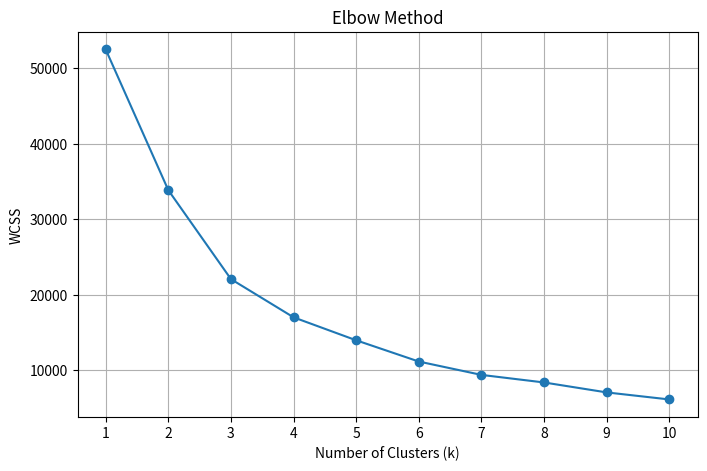

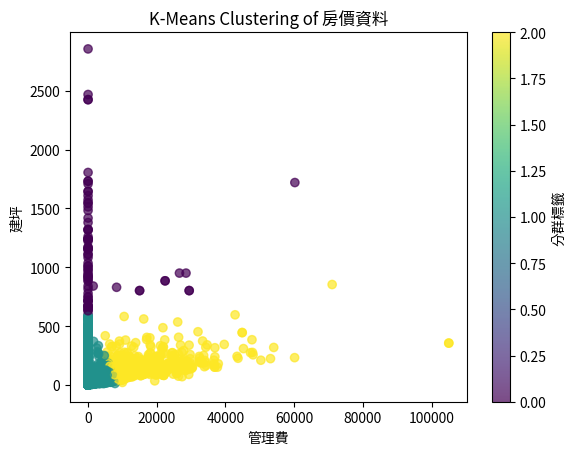

             總價     建坪       地坪    主建物    陽台    主+陽   共有部分  停車空間(含公設)    雨遮  \
0      39600000  40.57     2.78  21.21  2.06  23.27  16.60        0.0  0.00   
1      26600000  36.09    12.35  24.03  2.89  26.92   9.16        0.0  0.00   
2      15800000  37.37     7.18   0.00  0.00   0.00   0.00        0.0  0.00   
3      46800000  65.02    13.63  27.00  0.00   0.00   3.02        0.0  0.00   
4      29250000  17.05     3.72   7.87  0.75   8.62   6.83        0.0  1.59   
...         ...    ...      ...    ...   ...    ...    ...        ...   ...   
26302   8680000   0.00   434.30   0.00  0.00   0.00   0.00        0.0  0.00   
26303   5980000  24.96     6.31  21.84  0.00   0.00   0.00        0.0  0.00   
26304  62800000   0.00  1395.81   0.00  0.00   0.00   0.00        0.0  0.00   
26305  11980000  35.74    24.42  35.74  0.00   0.00   0.00        0.0  0.00   
26306  25800000   0.00  1483.16   0.00  0.00   0.00   0.00        0.0  0.00   

       防空避難室兼停車場  ...    屋齡  車位   管理費  縣市別  格局(房) 格

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# 類別型資料編碼
label_encoder = LabelEncoder()
# Dataset['縣市別_編碼'] = label_encoder.fit_transform(Dataset['縣市別'])

# 特徵選擇與標準化
features = Dataset[['管理費', '建坪']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 計算不同群數的 WCSS
wcss = []
k_values = range(1, 11)  # 嘗試 1 到 10 群
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ 屬性表示 WCSS

# 使用 K-Means 分群
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# 將分群結果加入數據集
Dataset['分群標籤'] = kmeans_labels

# 繪製肘部法則圖
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid()
plt.show()

# 分群視覺化
plt.scatter(Dataset['管理費'], Dataset['建坪'], c=Dataset['分群標籤'], cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering of 房價資料")
plt.xlabel("管理費")
plt.ylabel("建坪")
plt.colorbar(label='分群標籤')
plt.show()

print(Dataset)